In [11]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [12]:
# CIFAR-10是一个包含了60000张32×32像素的三通道图像数据集
IMG_CHANNELS =3
IMG_ROWS = 32
IMG_COLS =32

In [13]:
#常量
BATCH_SIZE = 128
NB_EPOCH =20
NB_CLASSES =10
VERBOSE =1
VALIDATION_SPLIT=0.2
OPTIM=RMSprop()

In [14]:
def read_dataset(path="G://cifar-10-batches-py//"):
    x_train = np.empty((50000, 32, 32, 3), dtype='uint8')
    y_train = np.empty((50000,), dtype='uint8')
    x_test = np.empty((10000, 32, 32, 3), dtype='uint8')
    y_test = np.empty((10000,), dtype='uint8')
    for i in range(1, 6):
        path_num = path + "data_batch_" + str(i)
        f = open(path_num, 'rb')
        datadict = pickle.load(f, encoding='bytes')
        x_train[(i - 1) * 10000:i * 10000, :, :, :] = datadict[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
        y_train[(i - 1) * 10000:i * 10000] = datadict[b'labels']
    f = open(path + "test_batch", 'rb')
    datadict = pickle.load(f, encoding='bytes')
    x_test[0:10000, :, :, :] = datadict[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
    y_test[0:10000] = datadict[b'labels']
    return (x_train, y_train), (x_test, y_test)

In [15]:
(X_train, y_train) , (X_test , y_test)  = read_dataset()  # 加载数据集
print('X_train.shape:' , X_train.shape)
print(X_train.shape[0] , 'train smaple')  
print(X_test.shape[0] , 'test smaple')  

X_train.shape: (50000, 32, 32, 3)
50000 train smaple
10000 test smaple


In [16]:
#分类转换
Y_train =np_utils.to_categorical(y_train, NB_CLASSES) 
Y_test =np_utils.to_categorical(y_test, NB_CLASSES)

In [17]:
#看成f1oat类型并归一化
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
#网络
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))            
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [22]:
#训练
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_split=VALIDATION_SPLIT,verbose = VERBOSE)
score = model.evaluate(X_test,Y_test,batch_size = BATCH_SIZE,verbose = VERBOSE)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 9s 222us/step - loss: 1.8002 - accuracy: 0.3501 - val_loss: 1.8508 - val_accuracy: 0.3821
Epoch 2/20
40000/40000 [==============================] - 5s 133us/step - loss: 1.3559 - accuracy: 0.5168 - val_loss: 1.2016 - val_accuracy: 0.5667
Epoch 3/20
40000/40000 [==============================] - 5s 127us/step - loss: 1.1400 - accuracy: 0.5994 - val_loss: 1.0063 - val_accuracy: 0.6456
Epoch 4/20
40000/40000 [==============================] - 5s 128us/step - loss: 0.9980 - accuracy: 0.6519 - val_loss: 0.9396 - val_accuracy: 0.6706
Epoch 5/20
40000/40000 [==============================] - 5s 127us/step - loss: 0.8959 - accuracy: 0.6882 - val_loss: 0.8839 - val_accuracy: 0.6978
Epoch 6/20
40000/40000 [==============================] - 5s 130us/step - loss: 0.8250 - accuracy: 0.7122 - val_loss: 0.8083 - val_accuracy: 0.7184
Epoch 7/20
40000/40000 [==============================] - 5s 1

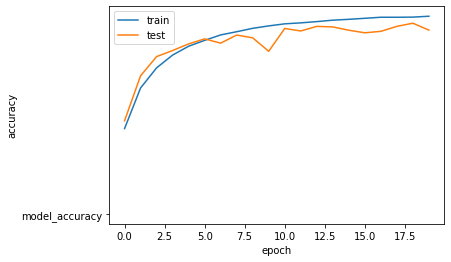

In [23]:
#汇总准确率历史数据
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

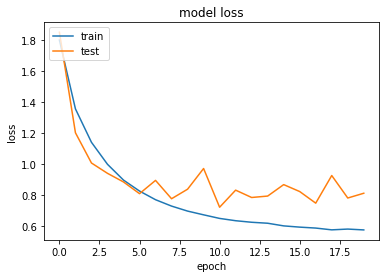

In [24]:
#汇总损失函数历史数据
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [25]:
#保存模型
model_json = model.to_json()
open('cifar10_architecture.json','w').write(model_json)
model.save_weights('cifar10_weights.h5',overwrite=True)